### Naive Bayes - Mushroom Dataset :
- Goal is to predict the class of mushrooms, given some features of the mushrooms.We will use Naive Bayes Model for this Classification.

### Step 1: Load the Dataset

In [55]:
import numpy as np
import pandas as pd

In [56]:
df = pd.read_csv("naive_mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [57]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [58]:
df.shape # 23 features
#data is non - numeric

(8124, 23)

### Step 2: Encode the categorical data into numeric data
- We iterate over the data , and alot each unique charater a value
- For example we can assign value 1 to p  and then create a dictionary of characters with key-values as a number.
- We can use scikit learn instead.

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le = LabelEncoder()
ds = df.apply(le.fit_transform) 
# df.apply - , it can take a function as an argument
#It can be done on pandas dataframe
# It applies tranformation on each column 

In [61]:
df.apply?
# basically it updates rthe each row


Signature:
df.apply(
    func: 'AggFuncType',
    axis: 'Axis' = 0,
    raw: 'bool' = False,
    result_type: "Literal['expand', 'reduce', 'broadcast'] | None" = None,
    args=(),
    by_row: "Literal[False, 'compat']" = 'compat',
    **kwargs,
)
Docstring:
Apply a function along an axis of the DataFrame.

Objects passed to the function are Series objects whose index is
either the DataFrame's index (``axis=0``) or the DataFrame's columns
(``axis=1``). By default (``result_type=None``), the final return type
is inferred from the return type of the applied function. Otherwise,
it depends on the `result_type` argument.

Parameters
----------
func : function
    Function to apply to each column or row.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Axis along which the function is applied:

    * 0 or 'index': apply function to each column.
    * 1 or 'columns': apply function to each row.

raw : bool, default False
    Determines if row or column is passed as a Series or ndarray ob

In [62]:
le.fit_transform?
# return the encoded labels

Signature: le.fit_transform(y)
Docstring:
Fit label encoder and return encoded labels.

Parameters
----------
y : array-like of shape (n_samples,)
    Target values.

Returns
-------
y : array-like of shape (n_samples,)
    Encoded labels.
File:      /opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py
Type:      method

In [63]:
print(type(ds))

<class 'pandas.core.frame.DataFrame'>


In [64]:
ds.head(n=3)
# now we have data in numeric form

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3


In [65]:
data = ds.values # converting dataframe into array
print(data.shape)
print(type(data))
print(data[: 5, :])

(8124, 23)
<class 'numpy.ndarray'>
[[1 5 2 4 1 6 1 0 1 4 0 3 2 2 7 7 0 2 1 4 2 3 5]
 [0 5 2 9 1 0 1 0 0 4 0 2 2 2 7 7 0 2 1 4 3 2 1]
 [0 0 2 8 1 3 1 0 0 5 0 2 2 2 7 7 0 2 1 4 3 2 3]
 [1 5 3 8 1 6 1 0 1 5 0 3 2 2 7 7 0 2 1 4 2 3 5]
 [0 5 2 3 0 5 1 1 0 4 1 3 2 2 7 7 0 2 1 0 3 0 1]]


### Step 3: Converting the array in x and y form as 0th row is target

In [66]:
data_x = data[:, 1:]
data_x.shape

(8124, 22)

In [67]:
data_y = data[:, 0]
data_y.shape

(8124,)

In [68]:
data_y

array([1, 0, 0, ..., 0, 1, 0])

### Step 4: Break the data into train and test

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

In [71]:
print(x_train.shape, y_train.shape)

(6499, 22) (6499,)


In [72]:
np.unique(y_train) # binary class classification

array([0, 1])

In [73]:
np.unique(x_train)
# so there are 12 unique features on which we are going to decide 
# using naive bayes that class does it belong
# inversetranform -- numeric to char encoding

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

### Step 5: Mushroom Classifier - Prior and Conditional Probability
### Building our calssifier

In [74]:
a = np.array([0, 0, 0, 1, 1, 1, 0, 1,6,6,4])
print(np.sum(a ==1))# return the count 
print(np.sum(a>=3))
print(a== 0)

4
3
[ True  True  True False False False  True False False False False]


In [75]:
def prior_prob(y_train, label):
    total_examples = y_train.shape[0]
    class_examples = np.sum(y_train == label)
    return round((class_examples/total_examples), 2)
    

In [76]:
prior_prob(y_train, 0)

0.52

In [77]:
prior_prob(y_train, 1)

0.48

In [78]:
y = np.array([0, 5, 5, 1, 1, 1, 1, 0, 0, 0])
prior_prob(y, 1)

0.4

In [79]:
def cond_prob(x_train, y_train, feature_col, feature_val, label):
# p(xi= greenxolor | y = c ) it is conditional probability
# where feature _col is x1,x2, ..xn features,
#feature values are its corresponding value like x1 value is 1, x2 is 2
# for the corresponding label
#label are corresponding y labels
    x_train_filtered = x_train[y_train == label]
    #only those rows from x where 
    # y value is euqual to label
    numerator   =  np.sum(x_train_filtered[:, feature_col] == feature_val) 
    denominator =  np.sum(y_train == label)
    return round((numerator/float(denominator)), 2)

In [80]:
ith_feature = x_train[y_train == label]
def conditional_probability(ith_feature, fea_value_given_label, label)


SyntaxError: expected ':' (1064968256.py, line 2)

In [ ]:
# what we did is , let say we are talking baout second columnn,
# ie feature_col = 2
# feature_value = let say it is green color
# let say label is y =2 
# We need to compute p(x_2 = green | y = 2)
# therefore x_train_filtered = x_train[y_train == label] means,
# the x_2 with green feature given y label as 2
# it mean it contains all the x2 features with green color and a label =2


#numerator   =  np.sum(x_train_filtered[:, feature_col] == feature_val)
#means it will return count x_2 feature with all green color, with class
# 2
# denominator = np.sum( y_train == label ) contains all the color like 
# blue ,red , orange of class 2

In [ ]:
#x_train_filtered_ = x_train[y_train == 1] # check the shapes
#x_train_filtered,
#x_train_filtered.shape

In [ ]:
#num = x_train_filtered[:, 3] == 1

In [ ]:
#num

In [ ]:
#num.shape

### Next Step : Compute the Posterior Probability 

In [81]:
def predict(x_train, y_train, xtest):
    """ Xtest is a single testing point, n features"""
    classes = np.unique(y_train)
    # we need to know how many classes are there ie labels
    n_features = x_train.shape[1] 
    posterior_prob = [] 
    # List of prob for all classes and a given single testing point 
    # compute posterior for each class
    for label in classes :
    #posteior_c = likelyhood * prior
        likelihood = 1.0
    #likelyhood = product {(i =1 to n)(pxi| y =c)}
        for f in range (n_features):
            cond = cond_prob(x_train, y_train, f, xtest[f], label)
            likelihood  *= cond
            
        prior = prior_prob(y_train, label)
        posterior = likelihood*prior
        posterior_prob.append(posterior)
        
    pred = np.argmax(posterior_prob)
    return pred
    

In [82]:
np.unique(y_train)# binary class classification

array([0, 1])

In [83]:
x_test[1]

array([ 5,  3,  9,  1,  0,  1,  0,  0, 10,  0,  4,  2,  3,  7,  7,  0,  2,
        1,  4,  3,  5,  1])

In [84]:
x_test.shape

(1625, 22)

In [85]:
 predict(x_train , y_train, x_test[1])


0

In [86]:
y_test[1]

0

In [87]:
 predict(x_train , y_train, x_test[3])

1

In [88]:
y_test[3]

1

In [89]:
def score(x_train, y_train, x_test, y_test):
    pred = []
    for i in range(x_test.shape[0]):
        pred_label = predict(x_train, y_train, x_test[i])
        pred.append(pred_label)
    pred = np.array(pred) #converting pred list into a array for uing np.sum
    accuracy = np.sum(pred == y_test)/y_test.shape[0]
    return accuracy


In [90]:
print(score(x_train, y_train, x_test, y_test))

0.9926153846153846


### Naive Bayes for text Classification

### Movie Rating :
- each review is collection of words
- what we gonna do is that we predict the ratings using Naive bayes
- Assumption:
- 1) bag of words -- ordering is not important 
- 2) conditional Independence example, happy and liked -->> both are independent of each other.
  3) P(xi| y =c ) = [count(xi, y=c)]/[summation(1 to v){count(w, yi = c)}] where w is word

- But there are some drawback using naive bayes for example: in training set we have words good, happy, awesome and liked but lets suppose in our test set we have overjoyed as there is overjoyed in training set our naive bayes classifier will predict p("overjoyed"| y = +ve ) = 0, ie movie rating
is bad , which is wrong indeed.
- Problem : can't estimate P of unseen word as 0.

### Solution Laplace Smoothing/correction:
- p(xi| y =c ) = [count(xi, y=c) + 1]/[summation(1 to V){count(w, yi = c) +1}]
-  (count(xi, y=c) + 1)/ [summation(1 to V){count(w, yi = c)} + V]
-  V is vocab size

### Mutivariate Bernoulli Naive Bayes
- D1 = "Like I like to swim"
- D2 = "I like coding"
- vocab = (i, like , coidng, swim, to)-- list of words
- Since we are bernoulli , we wont consider the frequency of words
- converting D1 into vector = [1, 1, 0, 1, 1] 
- converting D2 into vector = [ 1, 1, 1, 0, 0]
- P(xi|y=c) = product{i=1 to n} P(xi|y=c)^b.(1 - P(xi|y=c))^(1-b)
- So, the probability of generating D1 sentence in the particular class let say c is = product{i=1 to n} P(xi|y=c)^b.(1 - P(xi|y=c))^(1-b)
- where b is   [1, 1, 0, 1, 1] for d1
- so probability of having the sentences will be product of having the words in the sentences
- In D1 for word "like" b = 1, "to" is = 1 , "coding" = 0 and we calculate the product of each word probability for a given class to get the probability of sentence of thegiven class

- Now P(xi| y =c )  Using maximum likelyhood estimator
- P(xi| y =c )
- = {(count of documents having class c and contain xi)+ 1}/{(count of docs in class c) +2 } -- since it is a bernouli model
- where +1 and +2 are parameters of laplace smoothing

### Multinomial Naive Bayes:
- Text classification
- Normalised term frequency = tf(t, d)/ n_d, where n_d is no. of documents
- tf(t, d) is term frequency where t is no. times word appeared in word d
- P(y|x) = product(P(xi|y).P(y)
- P(xi|y=c) = summation {tf(xi , d belongs to c class)+ alpha}/{(total no. documents where d belongs to class c) + (alpha * V)}
  

### Multivariate Bernoulli Event Model 
- " offer for you..." spam message
- what we do
- let say there dictionary with 10k words in our vocab
- First we convert it into vector using vectorization / bag of words
- 1) probability of spam email P(y =spam) 
- 2) Iterate over all the words and check and multiply the probabilities of each word implies
  3) P(xi = 1 | y = spam) = p(xi | y = spam)
  4) p(xi = 0 | y = spam) = 1 - p(xi | y = spam)
  5) L(0) = product(i=1 to v){ p(xi | y = spam)^b*(1 - p(xi | y = spam)^(1-b)).P(spam)
  6) We are mutlipying v times
  7) Boolean , discrete

### Multinomial Event Model
- "offer for you..." spam message
- what we do
- let say there dictionary with 10k words in our vocab
- 1) probability of spam email P(y =spam) 
- 2) Iterate over all the words and check and multiply the probabilities of each word implies
  3) p(offer| y ="spam") = P(x1|y = spam)P(x2 = for | y= spam) p(x3 = you| y = spam), where xi is coming from multinomial distribution
  4) When data is large this model performs better
  5) discrete but xi can have various different values.

### Gaussian Naive Bayes:
- Suitable for gaussian  distribution
- used for continuos valued features
- P(xi| ) = {1/(underroot(2*pie) * sigma)} e ^-(x -u) ^2/ (2* sigma**2)
- 2d case cluster may be showing gaussian dsitribution 

In [91]:
from sklearn.naive_bayes import GaussianNB

In [92]:
gnb = GaussianNB()

In [93]:
from sklearn.datasets import  make_classification
import matplotlib.pyplot as plt

In [116]:
X, Y = make_classification(n_samples = 2000, n_features = 2, n_informative =2, n_redundant = 0, random_state =5)

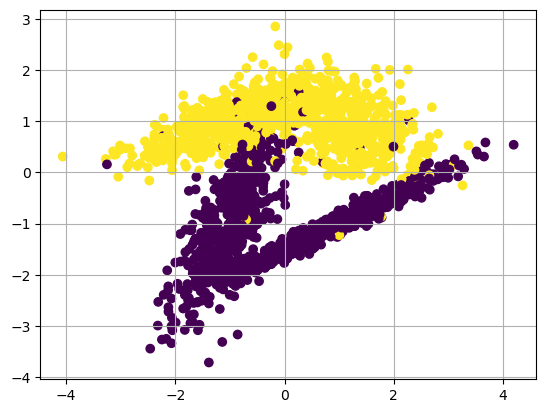

In [117]:
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.grid()
plt.show()


In [118]:
print(X[0])

[1.82291849 0.90283471]


In [119]:
print(X.shape)

(2000, 2)


#### Train classifier

In [120]:
gnb.fit(X, Y)

GaussianNB()

In [121]:
gnb.score(X, Y)

0.9415

In [122]:
ypred = gnb.predict(X)

In [123]:
print(ypred)

[1 1 0 ... 0 0 1]


In [124]:
print(Y)

[1 1 0 ... 0 0 1]


In [125]:
import numpy as np

accuracy=(np.sum(ypred == Y)/ X.shape[0])*100
print(accuracy)

94.15


### Built Confusion Martix

In [126]:
from sklearn.metrics import confusion_matrix

In [127]:
cnf_matrix = confusion_matrix(Y, ypred)
#cnf_matrix take to parameters actual value of Y and predicted value of y

In [128]:
print(cnf_matrix) # 925-TP , 958-TN , 79 - FP, 38 -FN

[[925  79]
 [ 38 958]]


### Visualize Confusion Matrix:

In [129]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[925  79]
 [ 38 958]]


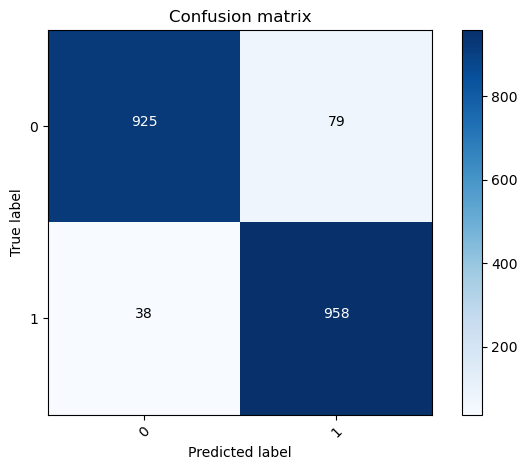

In [130]:
plot_confusion_matrix(cnf_matrix, [0,1], normalize = False, title='Confusion matrix')

In [109]:
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [131]:
mnb = MultinomialNB()

In [132]:
mnb.fit(x_test, y_test)

MultinomialNB()

In [142]:
Y_mnb_predicted = mnb.predict(x_test)


In [143]:
cnf_matrix = confusion_matrix(y_test, Y_mnb_predicted)

In [144]:
print(cnf_matrix)

[[788  68]
 [263 506]]


In [147]:
import numpy as np

In [151]:
classes_labels = np.arange(2)

- Diagonal entries represents # no. of elements where Predicted Class = Actual class.

Confusion matrix, without normalization
[[788  68]
 [263 506]]


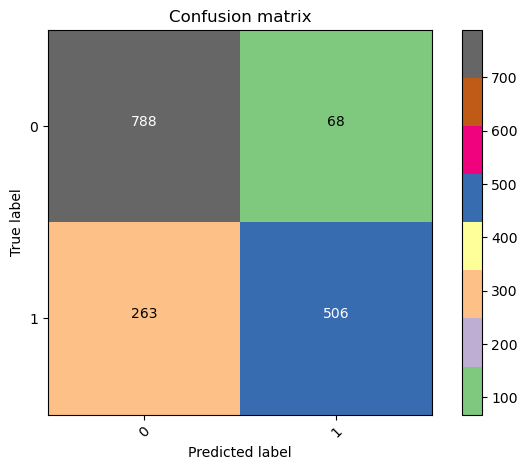

In [153]:
plot_confusion_matrix(cnf_matrix, classes =classes_labels,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Accent)

### Naive Bayes on MNIST Dataset

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

### Data preparation 

In [ ]:
digits = load_digits()

In [ ]:
X = digits.data

In [ ]:
Y = digits.target

In [ ]:
print(X.shape, Y.shape)

In [ ]:
plt.imshow(X[0].reshape(8, 8), cmap = "grey")
plt.show()

In [ ]:
print(Y[1])

In [ ]:
print(X[0])# 
#discrete values
# 0-255 for RGB,
#but in gray scale 0 to 15-there are 16 level of grey , where 0 is black and 
# 15 is white

### Train Model

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [ ]:
mnb = MultinomialNB()
gnb = GaussianNB()

In [ ]:
mnb.fit(X, Y)
gnb.fit(X, Y)

In [ ]:
print(mnb.score(X,Y))
print(gnb.score(X,Y))

In [ ]:
cross_val_score(gnb, X,Y, scoring = "accuracy", cv = 10).mean()

In [ ]:
cross_val_score(mnb, X,Y, scoring = "accuracy", cv = 10).mean()

#### This is because each feature is discrete valued hence mnb gives better result as xi has discrete features , but gaussian consider